*****Jeyshinee Pyneeandee, April 2024***** <br>
## ISIS Metadata Reading Accuracy QA (ISIS A & B)
This script is to manually test the accuracy of KERAS for its metadata reading. The script tests ISIS A and ISIS B ionograms separately. 

In [51]:
#required imports
import matplotlib.pyplot as plt
import glob
import os
import random
from random import randrange
import csv
import pandas as pd
import numpy as np
import matplotlib.image as mpimg
from PIL import Image

In [2]:
rootDir = 'L:/DATA/ISIS/'

imageDir1 = rootDir + 'ISIS_101300030772/'
imageDir2 = rootDir + 'ISIS_102000056114/'
imageDir3 = rootDir + 'raw_upload_20230421/'

logDir = rootDir + 'ISIS_Test_Metadata_Analysis/MERGED/'

In [3]:
sample_size = 50

In [ ]:
df_master = pd.read_csv(logDir + 'Final_Merged.csv', low_memory= False)

## ISIS A Ionograms

We randomly sample 50 ISIS A ionograms from the master results file to test accuracy. 

In [5]:
filter_df_num = df_master[df_master['Subdirectory'].str.contains("ISIS A")]
selected_rows_num = filter_df_num.sample(sample_size)

In [6]:
print(selected_rows_num.head(5))

        Unnamed: 0.1  Unnamed: 0  Satellite_Code  Fixed_Frequency_Code  \
63276          63276          64               3                     2   
109405        109405          24               3                     6   
806932        806932         281               3                     3   
443133        443133         243               3                     1   
343409        343409          40               3                     2   

        Station_Number             Station_Location Station_ID  Station_Lat  \
63276               69              Unknown Station    UNKNOWN          1.0   
109405               5               Quito, Ecuador        QUI          0.0   
806932              16  Johannesburg, South Africa         BUR        -25.0   
443133              74                            0          0          0.0   
343409              16  Johannesburg, South Africa         BUR        -25.0   

        Station_Lon  Year  Day  Hour  Minute  Second       Filename  \
63276    

In [7]:
for _, row in selected_rows_num.iterrows():
    directory = row['Directory']
    subdirectory = row ['Subdirectory']
    filename = row ['Filename']
    image_path1 = os.path.join(imageDir1, directory, subdirectory, filename)
    image_path2 = os.path.join(imageDir2, directory, subdirectory, filename)
    image_path3 = os.path.join(imageDir3, directory, subdirectory, filename)

    
    if os.path.exists(image_path1):
        print ("Image Path:", image_path1)
        image = Image.open(image_path1)
        image.show()
    
    elif os.path.exists(image_path2):
        print ("Image Path:", image_path2)
        image = Image.open(image_path2)
        image.show()
    
    elif os.path.exists(image_path3):
        print ("Image Path:", image_path3)
        image = Image.open(image_path3)
        image.show()

    else: 
        print ("Image not found")
    

Image Path: L:/DATA/ISIS/ISIS_101300030772/b13_R014207853\B1-35-11 ISIS A C-1782\Image0080.png
Image Path: L:/DATA/ISIS/ISIS_101300030772/b15_R014207728\B1-35-10 ISIS A C-1710\Image0027.png
Image Path: L:/DATA/ISIS/raw_upload_20230421/R014207848\B1-35-7 ISIS A C-1557\Image486.png
Image Path: L:/DATA/ISIS/ISIS_101300030772/b34_R014207854\B1-35-12 ISIS A C-1843\Image0273.png
Image Path: L:/DATA/ISIS/ISIS_101300030772/b28_R014207705\B1-34-55 ISIS A C-612\Image0317.png
Image Path: L:/DATA/ISIS/ISIS_101300030772/b16_R014207847\B1-35-5 ISIS A C-1424\Image0460.png
Image Path: L:/DATA/ISIS/ISIS_101300030772/b10_R014207713\B1-34-61 ISIS A C-931\Image0085.png
Image Path: L:/DATA/ISIS/raw_upload_20230421/R014207848\B1-35-7 ISIS A C-1579\Image0422.png
Image Path: L:/DATA/ISIS/ISIS_101300030772/b16_R014207847\B1-35-5 ISIS A C-1411\Image0245.png
Image Path: L:/DATA/ISIS/raw_upload_20230421/R014207848\B1-35-7 ISIS A C-1534\Image0060.png
Image Path: L:/DATA/ISIS/ISIS_101300030772/b24_R014207706\B1-35-

In [ ]:
print ("Please read the metadata for each of the 50 images above and the values in the boxes below")
print ("Write N/A if any of the values were not present or not easy to read.")

second_data = []
for _, row in selected_rows_num.iterrows():
    directory = row['Directory']
    subdirectory = row ['Subdirectory']
    filename = row ['Filename']  

    Station_Number = input ("Station number: ")
    Year = input ("Add the Year: ")
    Day = input ("Add the Day: ")
    Hour = input ("Add the Hour: ")
    Minute = input ("Add the Minutes: ")
    Second = input ("Add the Seconds: ")
    Issue = ''

    if row['Year'] != int(Year):
        Issue = 'Year'
    if row['Day'] != int(Day):
        Issue = Issue + ', Day'
    if row['Minute'] !=  int(Minute):
        Issue = Issue + ', Minute'
    if row['Second'] != int(Second):
        Issue = Issue + ', Second'  
    if row['Station_Number'] != int(Station_Number):
        Issue = Issue + ', Station_Number'
    
    if len(Issue) == 0:
        Issue = 'None'
    second_data.append([directory, subdirectory, filename, Station_Number, Year, Day, Hour, Minute, Second, Issue])
    
with open ('L:/DATA/ISIS/ISIS_Test_Metadata_Analysis/ISIS_A_Accuracy_QA.csv', 'a', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(["Directory","Subdirectory", "Filename","Station_Number","Year", "Day",  "Hour", "Minute", "Second", "Issue"])
    for row in second_data:
        writer.writerow(row)

Total number of scanned ISIS A Ionograms: 400647
Number of ISIS A Images Analyzed: 50
Number of ionograms categorized correctly out of 50: 41
Estimated Success Rate out of 400647 Ionograms with consistent results: 0.82


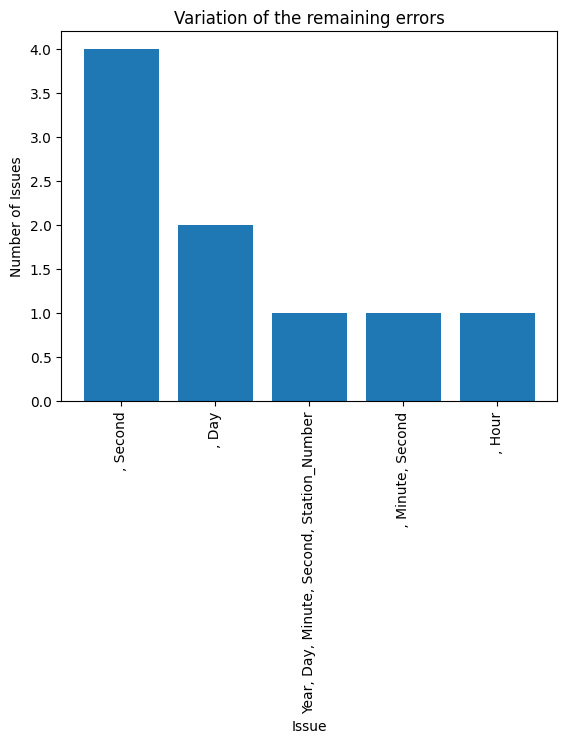

In [49]:
#Total Number of Num Categories
counting_ISIS_A = df_master[df_master['Subdirectory'].str.contains("ISIS A")]
print ('Total number of scanned ISIS A Ionograms:', len(counting_ISIS_A))

#Total number of Ionograms analyzed
df_num = pd.read_csv('L:/DATA/ISIS/ISIS_Test_Metadata_Analysis/ISIS_A_Accuracy_QA.csv')
total_len = len(df_num)
print ('Number of ISIS A Images Analyzed:', total_len)

#Filtering out correct categories
df_num['Issue'] = df_num['Issue'].astype(str)
df_num = df_num.loc[df_num['Issue'] != 'nan']
filtered_down_len = len(df_num)
print('Number of ionograms categorized correctly out of 50:', total_len - filtered_down_len)

#Estimated success rate
success_rate = (total_len - filtered_down_len)/total_len
Estimation = round(success_rate*len(counting_ISIS_A))
print('Estimated Success Rate out of 400647 Ionograms with consistent results:', round(Estimation/len(counting_ISIS_A),2))

#Plotting the variation of issues
issue_counts_num = df_num["Issue"].value_counts()
plt.bar(issue_counts_num.index, issue_counts_num.values)
plt.title ("Variation of the remaining errors")
plt.xlabel("Issue")
plt.ylabel("Number of Issues")
plt.xticks(rotation=90)
plt.show()

## ISIS B Ionograms
We repeat the same process with ISIS B Ionograms.

In [42]:
filter_df_num_B = df_master[df_master['Subdirectory'].str.contains("ISIS B")]
selected_rows_num_B = filter_df_num_B.sample(sample_size)

In [43]:
print(selected_rows_num_B.head(5))

        Unnamed: 0.1  Unnamed: 0  Satellite_Code  Fixed_Frequency_Code  \
195325        195325         605               4                     5   
398431        398431         270               4                     1   
828268        828268          81               4                     1   
354007        354007          12               4                     6   
357768        357768         291               4                     5   

        Station_Number      Station_Location Station_ID  Station_Lat  \
195325              81       Unknown Station    UNKNOWN          1.0   
398431              50       Ottawa, Canada         OTT         45.0   
828268               0       Unknown Station    UNKNOWN          1.0   
354007              43  Resolute Bay, Canada        RES         74.0   
357768               8       Santiago, Chile        AGO        -33.0   

        Station_Lon  Year  Day  Hour  Minute  Second       Filename  \
195325          1.0    72   98     4      40      5

In [44]:
for _, row in selected_rows_num_B.iterrows():
    directory = row['Directory']
    subdirectory = row ['Subdirectory']
    filename = row ['Filename']
    image_path1 = os.path.join(imageDir1, directory, subdirectory, filename)
    image_path2 = os.path.join(imageDir2, directory, subdirectory, filename)
    image_path3 = os.path.join(imageDir3, directory, subdirectory, filename)

    
    if os.path.exists(image_path1):
        image = Image.open(image_path1)
        image.show()
    
    elif os.path.exists(image_path2):
        image = Image.open(image_path2)
        image.show()
    
    elif os.path.exists(image_path3):
        image = Image.open(image_path3)
        image.show()

    else: 
        print ("Image not found")
    

In [ ]:
print ("Please read the metadata for each of the 50 images above and the values in the boxes below")
print ("Write N/A if any of the values were not present or not easy to read.")

second_data = []
for _, row in selected_rows_num_B.iterrows():
    directory = row['Directory']
    subdirectory = row ['Subdirectory']
    filename = row ['Filename']  

    Station_Number = input ("Station number: ")
    Year = input ("Add the Year: ")
    Day = input ("Add the Day: ")
    Hour = input ("Add the Hour: ")
    Minute = input ("Add the Minutes: ")
    Second = input ("Add the Seconds: ")
    Issue = ''

    if row['Year'] != int(Year):
        Issue = 'Year'
    if row['Day'] != int(Day):
        Issue = Issue + ', Day'
    if row['Minute'] !=  int(Minute):
        Issue = Issue + ', Minute'
    if row['Second'] != int(Second):
        Issue = Issue + ', Second'  
    if row['Station_Number'] != int(Station_Number):
        Issue = Issue + ', Station_Number'
    
    if len(Issue) == 0:
        Issue = 'None'
    second_data.append([directory, subdirectory, filename, Station_Number, Year, Day, Hour, Minute, Second, Issue])
    
with open ('L:/DATA/ISIS/ISIS_Test_Metadata_Analysis/ISIS_B_Accuracy_QA.csv', 'a', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(["Directory","Subdirectory", "Filename","Station_Number","Year", "Day",  "Hour", "Minute", "Second", "Issue"])
    for row in second_data:
        writer.writerow(row)

Total number of scanned ISIS B Ionograms: 406807
Number of ISIS B Images Analyzed: 50
Number of ionograms categorized correctly out of 50: 40
Estimated Success Rate out of 838437 Ionograms with consistent results: 0.8


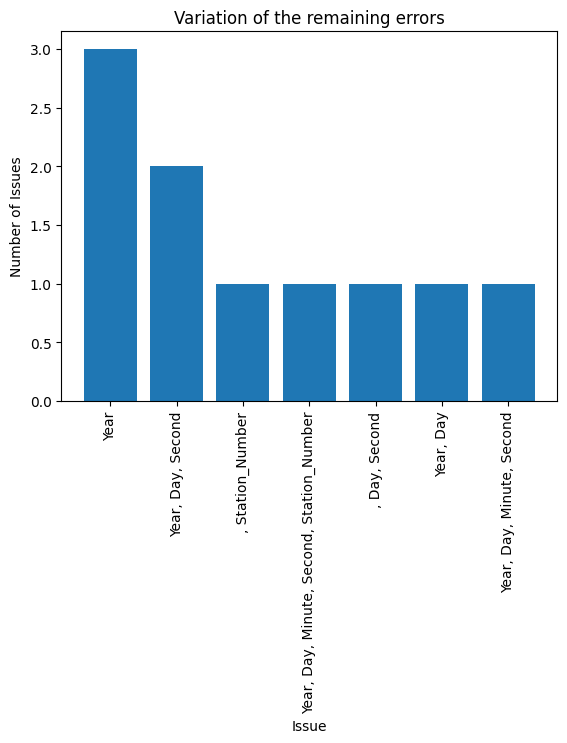

In [50]:
#Total Number of Num Categories
counting_ISIS_B = df_master[df_master['Subdirectory'].str.contains("ISIS B")]
print ('Total number of scanned ISIS B Ionograms:', len(counting_ISIS_B))

#Total number of Ionograms analyzed
df_num = pd.read_csv('L:/DATA/ISIS/ISIS_Test_Metadata_Analysis/ISIS_B_Accuracy_QA.csv')
total_len = len(df_num)
print ('Number of ISIS B Images Analyzed:', total_len)

#Filtering out correct categories
df_num['Issue'] = df_num['Issue'].astype(str)
df_num = df_num.loc[df_num['Issue'] != 'nan']
filtered_down_len = len(df_num)
print('Number of ionograms categorized correctly out of 50:', total_len - filtered_down_len)

#Estimated success rate
success_rate = (total_len - filtered_down_len)/total_len
Estimation = round(success_rate*len(counting_ISIS_B))
print('Estimated Success Rate out of 838437 Ionograms with consistent results:', round(Estimation/len(counting_ISIS_B),2))

#Plotting the variation of issues
issue_counts_num = df_num["Issue"].value_counts()
plt.bar(issue_counts_num.index, issue_counts_num.values)
plt.title ("Variation of the remaining errors")
plt.xlabel("Issue")
plt.ylabel("Number of Issues")
plt.xticks(rotation=90)
plt.show()